# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I will be predicting whether a given review is positive or negative. This is a supervised, binary classification given the nature of choosing between positive and negative. My only feature are the reviews, which are long texts. This problem is valuable because it allows a company to filter out reviews based on what they require for a given context. For example, maybe they want to highlight certain positive reviews, or take closer look at negative reviews.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
"""
The main focus for preprocessing will be tokenizing and specific cleanup related to NLP.

Since the nature of the problem involves sentiment analysis, 
I will be focused on creating a Deep Neural Network (DNN).

The dataset provided is relatively simple, and does not require
a deeper dive into datatypes or transformation since i

all new imports will be added in this cell:
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import random

In [4]:
# defining the feature and label
y = df['Positive Review']
X = df['Review']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)

In [5]:
print(X.shape)
print(X.dtypes)

(1973,)
object


In [6]:
for i in range(3):
    print(f'Review {i+1}: \n\n', X[random.randint(0,25)])

Review 1: 

 Unfortunately, this book is the sign of what passes for humour these days. Even though it may have been remotely funny (sometimes the author comes close to being bearable), the book never actually tries to be. 

Humour is supposed to be smart. However, this book gives us the worst case of dumb

Review 2: 

 As the name implies, this is about the elements of programming style. The examples are a bit dated (old languages, not C/C++/Java/the-next-great-language). But this isn't a *language* programming book, it is about how to write good programs in any language

Review 3: 

 As the name implies, this is about the elements of programming style. The examples are a bit dated (old languages, not C/C++/Java/the-next-great-language). But this isn't a *language* programming book, it is about how to write good programs in any language



## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I will be using a fitted tfidf_vectorizer to transform the test and training 
set to their numerical representations. 

The model I will be using for this project is a DAN, although
I did see an implementation of Logistic Regression model in
one of the previous activities, so I will attempt to also utilize
Logistic Regression here.
Generally though, DAN is the way to go for this problem.

I will be creating a DAN with 5 hidden layers, and 4 dropout layers. 
The number I have chosen here is not particularly important, and I will be adjusting it as I see fit.
I will use SGD as the optimization function, and using
keras.losses.BinaryCrossentropy for the loss function.
Finally, I'll plot the training and validation loss, and use these
values as a measure for how well the model is performing.

There is an option to choose Logistic Regression instead, and I've left hyperparameter numbers
that I saw fit best for the given data set, avoiding as much overfitting or underfitting 
as possible for either models.
For this model, I have opted to plot a precision-recall curve of the prediction to estimate
how well the model is performing.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [ ]:
# imports are done below

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
dan_model = None
logr_model = None

### MODEL TO USE ###
# 0 = dan model
# 1 = logistic regression
chosen_model = 1

### HYPERPARAMETERS CONTROL ###

## General
# vectorizer parameter control
min_df = 100
max_df = 10000

## LOGISTIC REGRESSION
max_iter = 1000
C = 2

## DAN
# determines number of hidden layers (8, 16, 32, 64)
layer_units = [64,64,64,32,32]
# determines number of filters. (# of filters == # of hidden layers) 
# (True or False)
filters = [True, False, True, True, False]
# 0.1-0.5
drop_rate = 0.25
# optimizer function (0.001-0.5)
learning_rate = 0.25

# num of epochs
num_epochs = 75

In [8]:
# create TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=min_df or 1, max_df=max_df or 99999, ngram_range=(1,2))

# transform data into numeric vectors
vectorizer.fit(X_train)

print("Vocabulary size {0}: ".format(len(vectorizer.vocabulary_)))
print(str(list(vectorizer.vocabulary_.items())[0:50])+'\n')

# transform both training and test data
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# printing matrix
print(X_train_tfidf.todense())

# storing the size to use as the `input_shape` of the DAN.
vocab_size = len(vectorizer.vocabulary_)

Vocabulary size 130: 
[('when', 119), ('first', 30), ('to', 107), ('all', 2), ('the', 91), ('of', 71), ('in', 46), ('was', 113), ('better', 16), ('for', 31), ('that', 89), ('by', 21), ('her', 41), ('book', 17), ('am', 4), ('more', 64), ('than', 88), ('this', 101), ('which', 120), ('me', 63), ('and', 6), ('way', 114), ('life', 59), ('so', 84), ('from', 33), ('very', 112), ('also', 3), ('you', 128), ('make', 61), ('an', 5), ('have', 39), ('my', 67), ('most', 65), ('will', 122), ('of the', 72), ('this book', 102), ('to the', 109), ('and the', 7), ('not', 70), ('just', 57), ('but', 20), ('they', 99), ('are', 9), ('much', 66), ('his', 42), ('into', 49), ('it', 53), ('is', 50), ('after', 1), ('then', 96)]

[[0.         0.         0.07956584 ... 0.         0.1504849  0.        ]
 [0.         0.08524911 0.         ... 0.         0.05654026 0.08549642]
 [0.05538943 0.07883854 0.16587905 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.   

In [9]:
# deep averaging network
if chosen_model == 0:
    import tensorflow.keras as keras
    import time

    dan_model = keras.Sequential()

    input_layer = keras.layers.InputLayer(input_shape=vocab_size)
    dan_model.add(input_layer)

    for i in range(len(layer_units)-1):
        dan_model.add(keras.layers.Dense(units=layer_units[i], activation='relu'))
        if filters[i]:
            dan_model.add(keras.layers.Dropout(drop_rate))
                      
    output_layer = keras.layers.Dense(units=1, activation='sigmoid')
    dan_model.add(output_layer)

    dan_model.summary()

    sgd_optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
    dan_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])



    # pulled from previous exercises, provided by activity
    class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
        def __init__(self, num_epochs: int, every_n: int = 50):
            self.num_epochs = num_epochs
            self.every_n = every_n
    
        def on_epoch_end(self, epoch, logs=None):
            if (epoch + 1) % self.every_n == 0:
                s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
                logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                          for k, v in logs.items()]
                s_list = [s] + logs_s
                print(', '.join(s_list))

In [10]:
# logistic regression
if chosen_model == 1:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score, root_mean_squared_error, r2_score, precision_recall_curve
    
    lr_model = LogisticRegression(max_iter=max_iter or 200, C=C)
    lr_model.fit(X_train_tfidf, y_train)

    
    probability_predictions = lr_model.predict_proba(X_test_tfidf)[:,1]

    class_label_predictions = lr_model.predict(X_test_tfidf)

In [11]:
# Data
if dan_model:
    t0 = time.time()
    
    history = dan_model.fit(X_train_tfidf.toarray(), y_train,
                            epochs=num_epochs,
                            verbose=0,
                            validation_split=0.15,
                            callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
                           )
    t1 = time.time()
    print('Elapsed time: %.2fs' % (t1-t0))

    probability_predictions = dan_model.predict(X_test_tfidf.toarray())
    
    loss, accuracy = dan_model.evaluate(X_test_tfidf.toarray(), y_test)

elif lr_model:
    auc = roc_auc_score(y_test, probability_predictions)
    examples = list(vectorizer.vocabulary_.items())[0:3]
    stop_words = list(vectorizer.stop_words_)[0:3]

    precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

    #lr_rmse = root_mean_squared_error(y_test, class_label_predictions)
    #lr_r2 = r2_score(y_test, class_label_predictions)

In [12]:
# comparison
if dan_model:
    print('Deep Averaging Network Check\n')
    print(f'Loss: {loss}\nAccuracy: {accuracy}')

    review_nums = [random.randint(0,200) for x in range(5)]
    for i in range(5):
        print(f'Review #{i+1}:\n')
        print(X_test.to_numpy()[review_nums[i]] + '\n')

        print(f'pred: is the review GOOD? {True if probability_predictions[review_nums[i]] >= .5 else False}\n') 

        print(f'actual: is the review actually GOOD? {y_test.to_numpy()[review_nums[i]]}\n')
        
elif lr_model:

    print('Logistic Regression Check\n')
    print(f'AUC on test data: {auc}')
    #print(f'[LR] Root Mean Squared Error: {lr_rmse}')
    #print(f'[LR] R2: {lr_r2}')
    print(f'size of feature space: {vocab_size}')
    print(f'first three entries of words mapped to col/feature idx: \n{examples}')
    print(f'first 3 stop words that are ignored: \n{stop_words}')

    review_nums = [random.randint(0,200) for x in range(5)]
    
    for i in range(5):
        print(f'Review #{i+1}:\n')
        print(X_test.to_numpy()[review_nums[i]] + '\n')

        print(f'pred: is the review GOOD? {class_label_predictions[review_nums[i]]}\n') 

        print(f'actual: is the review actually GOOD? {y_test.to_numpy()[review_nums[i]]}\n')

Logistic Regression Check

AUC on test data: 0.7928235882058972
size of feature space: 130
first three entries of words mapped to col/feature idx: 
[('when', 119), ('first', 30), ('to', 107)]
first 3 stop words that are ignored: 
['take her', 'fuhrman fasting', 'my ideal']
Review #1:

A lot of very useful info in a small book.  I'm less than half the way through and I've already learned enough to make it worth the investment to me.  The chapter on Using Tables was just what I needed. I would recommend this book to other beginners who are still trying to make sense of it all


pred: is the review GOOD? False

actual: is the review actually GOOD? True

Review #2:

What a great upbeat book that still covers the struggles of a child of a divorced family, living in poverty, and being of a mixed race.  Great great read with a great ending that wasn't to unbelievable.  It left you with a good feeling even though the struggles of the children were very real.  Great life lessons as well as cult

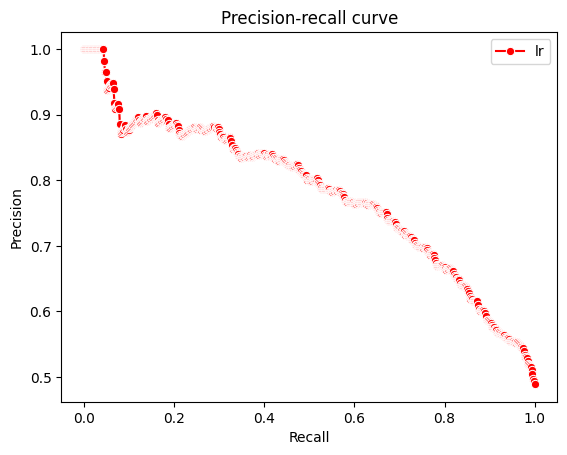

In [13]:
if dan_model:
    # Plot training and validation loss
    plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plot training and validation accuracy
    plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
elif lr_model:


    fig = plt.figure()
    ax = fig.add_subplot(111)

   
    p = sns.lineplot(x=recall, y=precision, color='red', marker='o', label='lr')

    plt.title("Precision-recall curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()